<a href="https://colab.research.google.com/github/UKD1211/100_days_ML_cX_ISI_DS/blob/main/function_transformer_day_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [45]:
df = pd.read_csv("/content/train.csv")

In [46]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [47]:
df = df[['Age','Fare','Survived']]
df.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [48]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy = "mean")
age_arr = si.fit(df[['Age']])

In [49]:
age_arr.transform(df[['Age']])

array([[22.        ],
       [38.        ],
       [26.        ],
       [35.        ],
       [35.        ],
       [29.69911765],
       [54.        ],
       [ 2.        ],
       [27.        ],
       [14.        ],
       [ 4.        ],
       [58.        ],
       [20.        ],
       [39.        ],
       [14.        ],
       [55.        ],
       [ 2.        ],
       [29.69911765],
       [31.        ],
       [29.69911765],
       [35.        ],
       [34.        ],
       [15.        ],
       [28.        ],
       [ 8.        ],
       [38.        ],
       [29.69911765],
       [19.        ],
       [29.69911765],
       [29.69911765],
       [40.        ],
       [29.69911765],
       [29.69911765],
       [66.        ],
       [28.        ],
       [42.        ],
       [29.69911765],
       [21.        ],
       [18.        ],
       [14.        ],
       [40.        ],
       [27.        ],
       [29.69911765],
       [ 3.        ],
       [19.        ],
       [29

In [50]:
df['Age'] = pd.DataFrame(age_arr.transform(df[['Age']]),columns = df[['Age']].columns)

In [51]:
df.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [52]:
df.isnull().sum()

,0
Age,0
Fare,0
Survived,0


In [53]:
X = df.iloc[:,[0,1]] # Assuming 'Age' is at index 0 and 'Fare' is at index 1
y = df.iloc[:,2]   # 'Survived' is at index 2

In [54]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

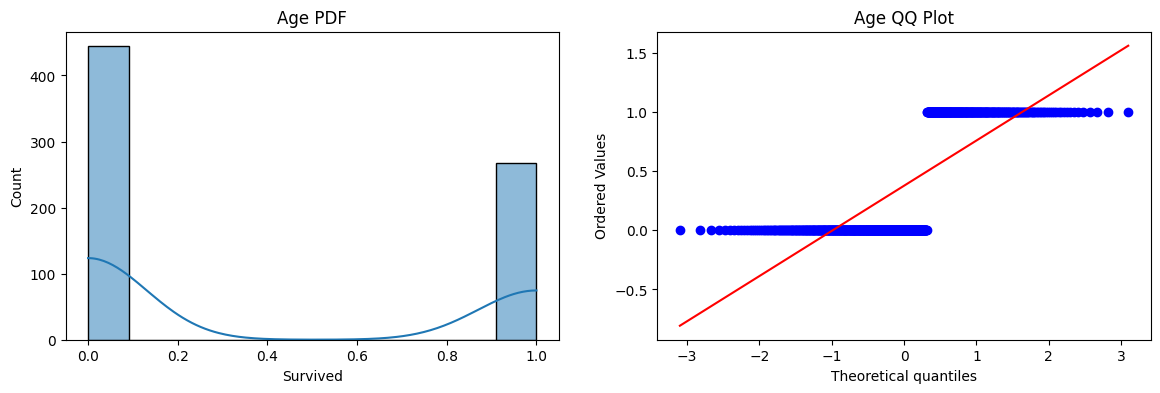

In [55]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(y_train, kde=True)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(y_train, dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

In [56]:
data  = np.random.lognormal(mean = 0,sigma = 1, size = 5000)

<Axes: ylabel='Density'>

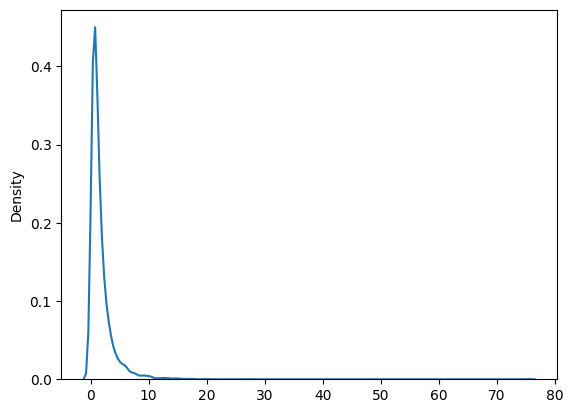

In [57]:
sns.kdeplot(data)

In [58]:
data2 = np.random.normal(loc =  0, scale = 1, size = 5000)

<Axes: ylabel='Density'>

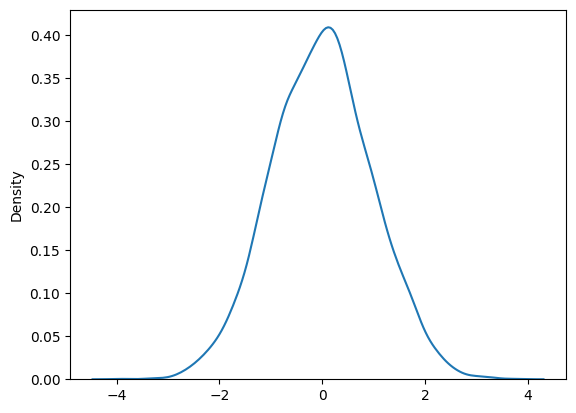

In [59]:
sns.kdeplot(data2)

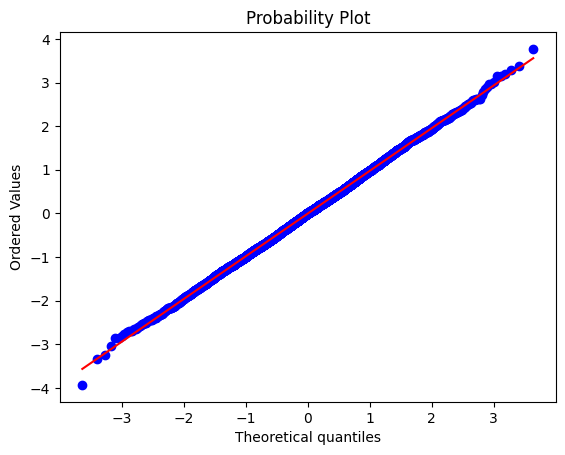

In [60]:
stats.probplot(data2, dist="norm", plot=plt)
plt.show()

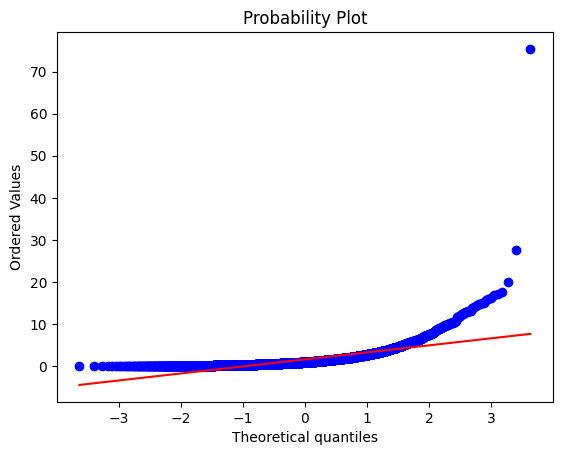

In [61]:
stats.probplot(data, dist="norm", plot=plt)
plt.show()

<Axes: xlabel='Fare', ylabel='Density'>

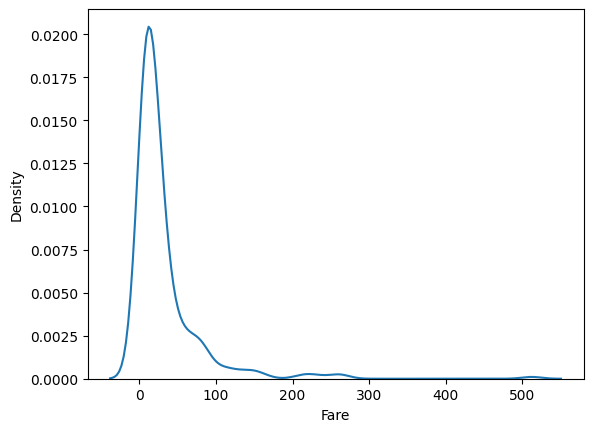

In [62]:
sns.kdeplot(df['Fare'])

/tmp/ipython-input-2981780686.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


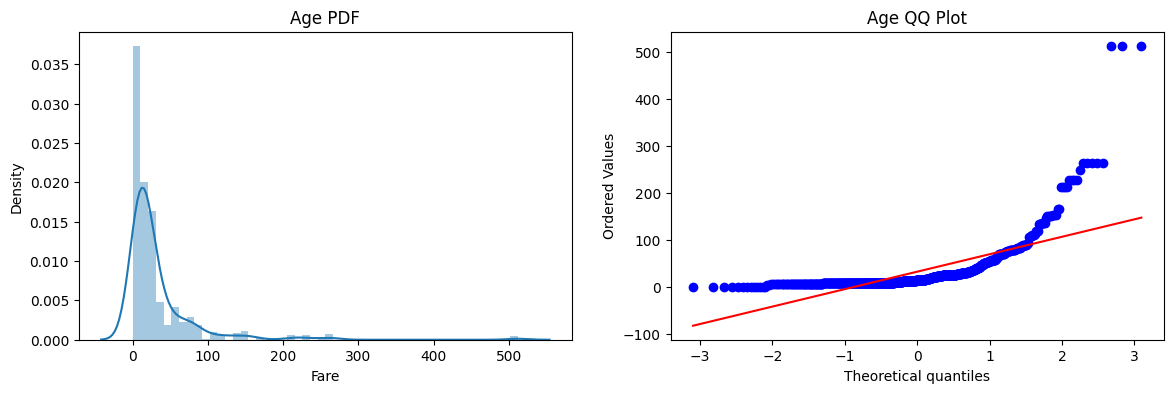

In [63]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

In [64]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [65]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6703910614525139


In [66]:
trf = FunctionTransformer(func = np.log1p)

In [68]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [70]:
X_train_transformed

,Age,Fare
331,3.839452,3.384390
733,3.178054,2.639057
382,3.496508,2.188856
704,3.295837,2.180892
813,1.945910,3.474293
...,...,...
106,3.091042,2.157559
270,3.424234,3.465736
860,3.737670,2.715244
435,2.708050,4.795791


In [69]:
clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.7374301675977654
Accuracy DT 0.5865921787709497


<Axes: xlabel='Fare', ylabel='Density'>

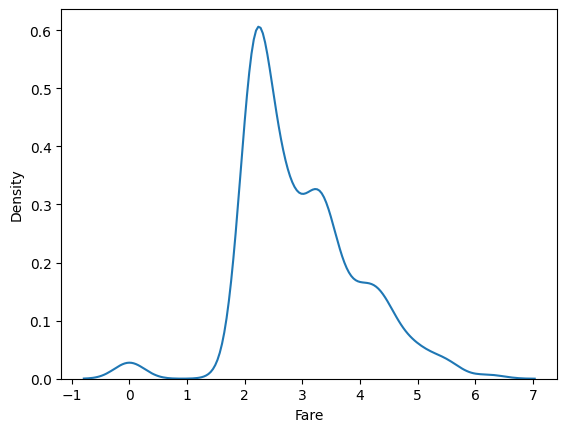

In [71]:
sns.kdeplot(X_train_transformed['Fare'])

In [72]:

X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6610611735330836


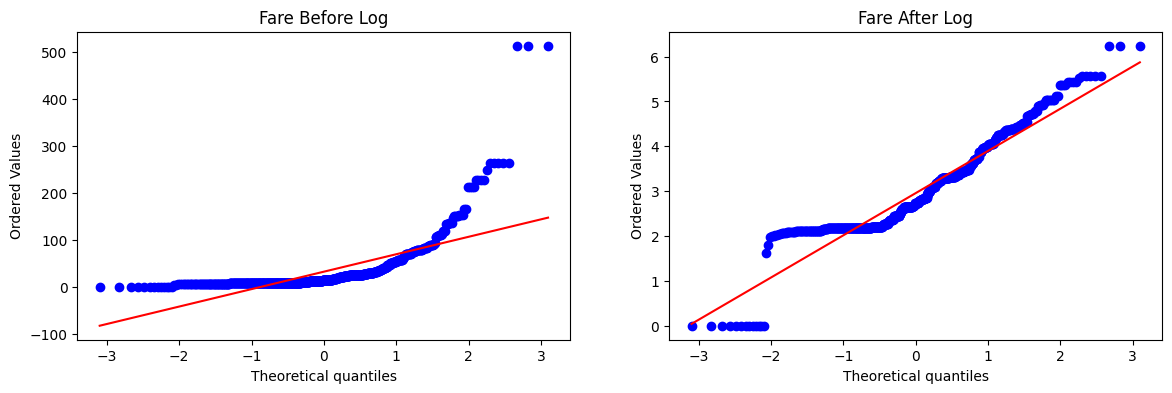

In [73]:

plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

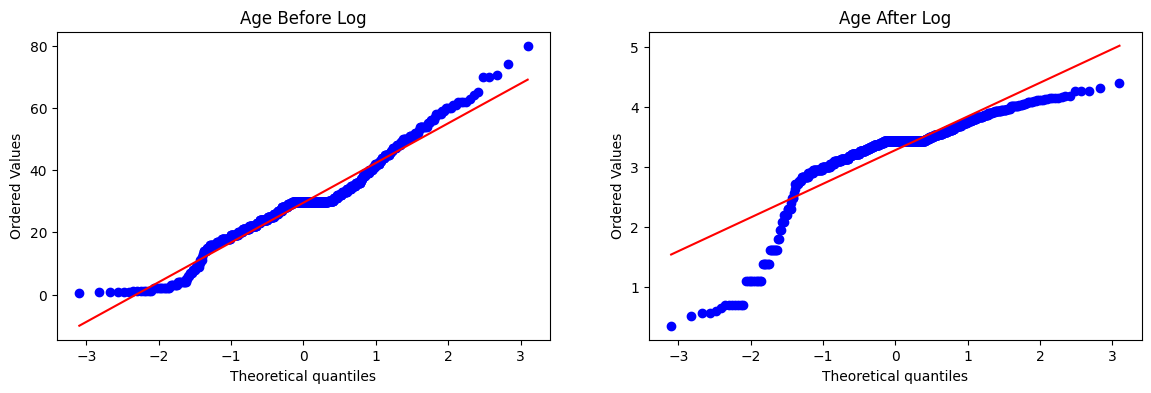

In [74]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

In [75]:
df

,Age,Fare,Survived
0,22.000000,7.2500,0
1,38.000000,71.2833,1
2,26.000000,7.9250,1
3,35.000000,53.1000,1
4,35.000000,8.0500,0
...,...,...,...
886,27.000000,13.0000,0
887,19.000000,30.0000,1
888,29.699118,23.4500,0
889,26.000000,30.0000,1


<Axes: xlabel='Age', ylabel='Density'>

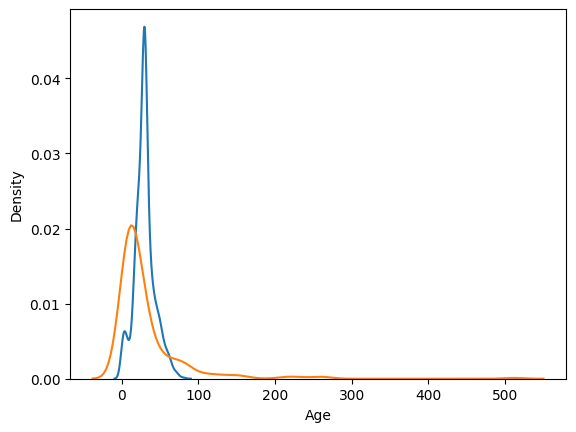

In [77]:
sns.kdeplot(df['Age'])
sns.kdeplot(df['Fare'])

In [79]:
df['Fare'].max()

512.3292

In [81]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [83]:
trf2 = ColumnTransformer([
    ('log',FunctionTransformer(np.log1p),['Fare'])
],remainder = 'passthrough')

In [84]:
X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [85]:

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6759776536312849


In [86]:

X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6554806491885143


In [89]:
def apply_transform(transform):
    X = df.iloc[:,[0,1]] # Features: 'Age', 'Fare'
    y = df.iloc[:,2]    # Target: 'Survived'

    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')

    X_trans = trf.fit_transform(X)

    clf = LogisticRegression()

    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

Accuracy 0.6195131086142323


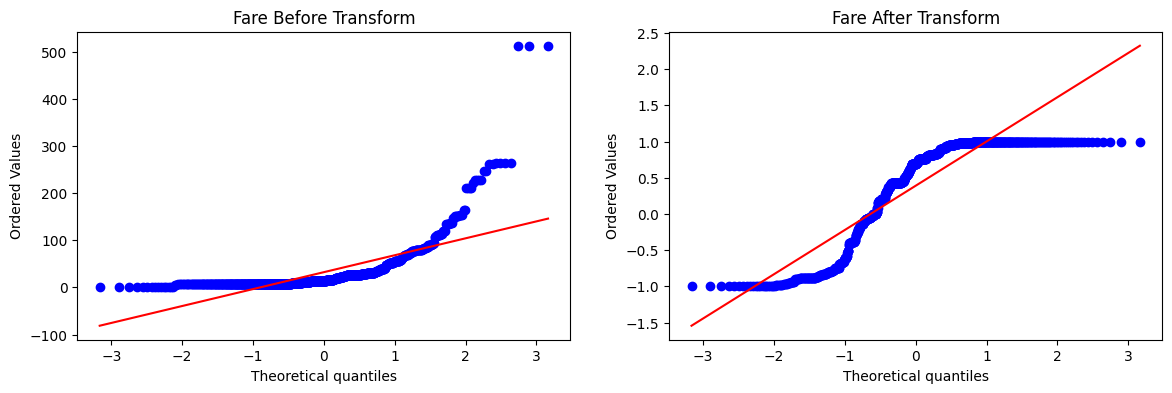

In [90]:

apply_transform(np.sin)

Accuracy 0.6431335830212235


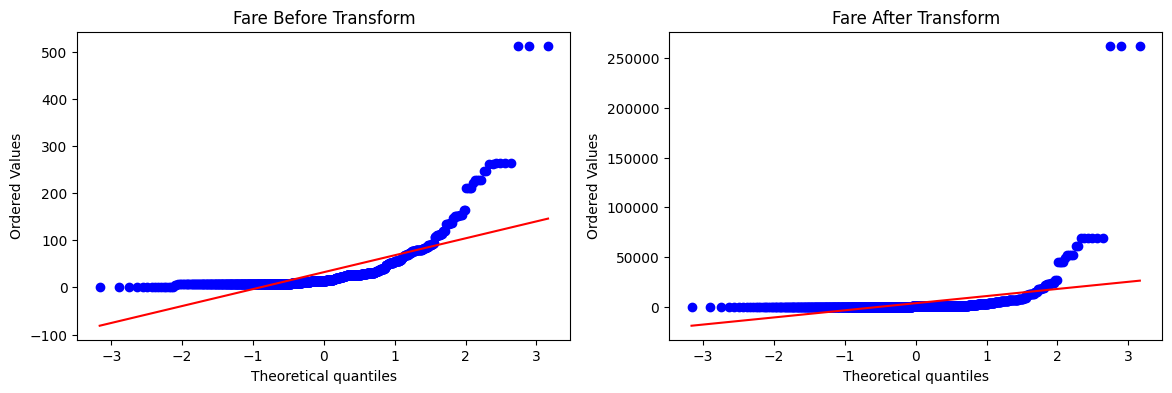

In [91]:
apply_transform(lambda x : x**2)

Accuracy 0.61729088639201


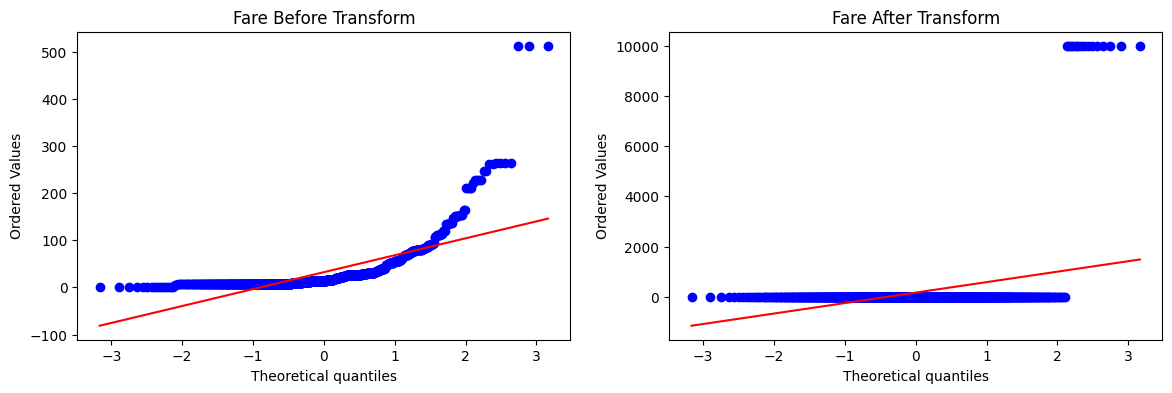

In [93]:
apply_transform(lambda x: 1/(x+0.0001))